# Lazy sounds in HK Cantonese: From a gender perspective

------
Languages and Society: Variation and Diversity

Li Lei @ CLS

04/06/2019

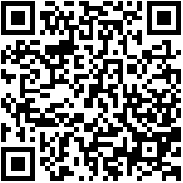

**https://github.com/LangLEvoI/lazysounds**

- Download the `LazySoundsinGender.slides.html` (mode=slide) 
- Click the `LazySoundsinGender.ipynb` (mode=notebook)

## Overview

1. Cantonese and Lazy Sounds
2. RQ, design and data
3. Agent-based modelling

## 1. Cantonese and Lazy Sounds

### What is Cantonese/Yue Chinese (廣東話/粤语/白話)

- A dialect (lang) in Chinese, about 130M native speakers
- Speaking in Southeastern China and overseas communities

### Distribution (pink: std. Yue)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Ping_and_Yue_dialect_map.svg/1024px-Ping_and_Yue_dialect_map.svg.png" width = "480" height = "320" alt="Can Dist" align=center />

<div align=right>(<font size="2">source: wiki/Cantonese</font>)</div>

## 1. Cantonese and Lazy Sounds

### Lazy Sounds (懒音)

> "...**lazy sounds**, the most commonly discussed in relation to phonetic changes in Hong Kong Cantonese, implies that the speaker is **'unwilling to put forth sufficient effort to articulate the standard pronunciation'**."

<div align=right>(<font size="2">source: wiki/Proper_Cantonese_pronunciation</font>)</div>

### Example
- ***gw***ong1 -> ***g***ong1
- ***n***aam4 -> ***l***aam4
- ***ng***4 -> ***m***4

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
import scipy.constants as const
import scipy
from scipy.io import wavfile
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from __future__ import division

In [29]:
def wavPlayer(**kwargs):
    """ will display html 5 player for compatible browser

    Parameters :
    ------------
    filepath : relative filepath with respect to the notebook directory ( where the .ipynb are not cwd)
               of the file to play

    The browser need to know how to play wav through html5.

    there is no autoplay to prevent file playing when the browser opens
    """
    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(kwargs['url'])
    display(HTML('<h3>{}</h3>'.format(kwargs['desc'])))
    display(HTML(src))

    
def youtubePlayer(width=640, height=480, **kwargs):
    display(HTML('<h3>{}</h3>'.format(kwargs['desc'])))
    display(YouTubeVideo(id=kwargs['id'], width=width, height=height,
                         start=kwargs['start'], end=kwargs['end']))

In [23]:
gwong1 = dict(desc='gwong1',
              url='https://humanum.arts.cuhk.edu.hk/Lexis/lexi-can/sound/gwong1.wav')
gong1 = dict(desc='gong1',
             url='https://humanum.arts.cuhk.edu.hk/Lexis/lexi-can/sound/gong1.wav')

In [26]:
wavPlayer(**gwong1)
wavPlayer(**gong1)

## 1. Cantonese and Lazy Sounds

### Who speaks Lazy Sounds

> In modern-day Hong Kong, **many younger native speakers** are unable to distinguish between certain phoneme pairs and merge one sound into another. Although that is often considered as substandard and is denounced as being lazy sounds, it is becoming more common and is influencing other Cantonese-speaking regions.

<div align=right>(<font size="2">source: https://worldliterate.com/standard-cantonese</font>)</div>

## 2. RQ, design and data

### From a observation

RQ: Female speakers prefer to say lazy sounds?

### Possible reasons

- Cool (?)
- Casual (std. Yue ~= give a speech)
- Innovator and female speakers are more positive to learn new languages than male speakers (Lai, M. L., 2007)

## 2. RQ, design and data

### Why Youtube?

- Young generation
- Would like to try something new
- 200~300 pronunciations
- [x] big party, easy but nosiy
- walking -> natural and casual (less NG)

### Control variates

- Age (95s)
- 3 male and 3 female vloggers
- BA
- Subscribe (100k-200k)
- When? (2yr)
- [x] Lang background
- [x] Social class
- [x] Identity

### Video examples

In [36]:
ngau4_au4 = dict(id='Qx19ALOOdMM', start=478, end=485, desc='ngau4 -> au4')
ngo5_o5 = dict(id='_Eqr14ZiZ88', start=0, end=2, desc='ngo5 -> o5')

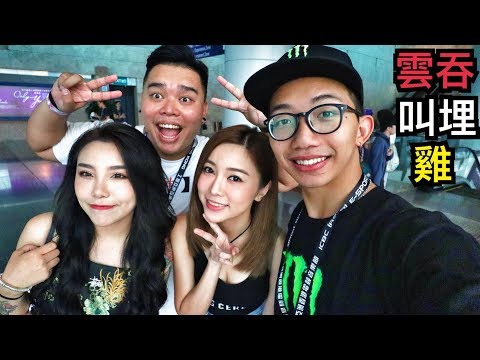

In [33]:
youtubePlayer(**ngau4_au4)

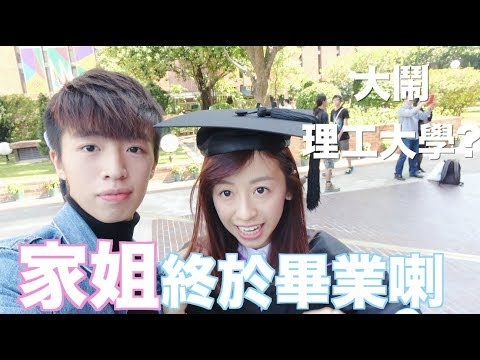

In [37]:
youtubePlayer(**ngo5_o5)

### 3. Agent-based modelling

### What is ABM?

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/943204329094fac8592d5d7cc829bbf706865b0d/6-Figure2-1.png" width="30%" height="30%">

- Agent **A**: speaks to 1 agent (**C**), hears from 4 agents (**B**, **D**, **E** and **F**)
- Higher "prestige" -> more listeners -> easy to be chosen and copied its variant
- E.g. when agent **A** chooses a neighbour, 1/6 for agent **B** and **D**; 2/6 for **E** and **F**.

<div align=right>(<font size="2">source: Fagyal et al. (2010)</font>)</div>

In [1]:
import copy
import random
import snap    # snap===4.1.0
import matplotlib.pyplot as plt    # matplotlib==2.1.1
import networkx as nx    # networkx==2.2
import numpy as np    # numpy==1.11.3
import pandas as pd    # pandas==0.23.4
import plotly.tools as tls    # plotly==3.8.1

from __future__ import division
from collections import (Counter, defaultdict)
from plotly.offline import (init_notebook_mode, iplot, iplot_mpl, plot)
from tqdm import trange    # tqdm==4.31.1

In [2]:
class VarDiffGraphModel(object):
    def __init__(self, num_var=8):
        """
        Initializing info

        :param num_var: the number of global language variants
        :return: None
        """
        # network info
        # the number of nodes and edges
        self.num_node = 0
        self.num_edge = 0
        self.net = defaultdict(lambda: defaultdict(list))

        # variants info
        # the number of variants
        self.num_var = num_var
        self.all_var_list = range(self.num_var)
        self.var_dict = defaultdict(int)
        self.last_var_dict = defaultdict(int)
        # a dict of var of agents, e.g. var_change_list[1] = [1, 2, 2, 3]
        # in t=1, the vars of agent 0 to 3 are 1, 2, 2 and 3
        self.var_df = pd.DataFrame()
        # a data frame for counting the number of variants
        # e.g. var_freq_df[1] = [0, 1, 2, 1]
        # in t=1, the numbers of vars 0 to 3 are 0, 1, 2 and 1
        self.var_freq_df = pd.DataFrame()

        # `networkx` object, for getting position layout
        self.nwx = nx.Graph()

    def set_nstruct(self, netobj):
        """
        Setting the type of network, e.g. R-MAT network, the input should be a
        object of `snap.PNGraph` (directed graph).

        :param netobj: the object of `snap.PNGraph`
        :return: None
        """
        if isinstance(netobj, snap.PNGraph):
            self._G = netobj
        else:
            raise AttributeError("network object should be `snap.PNGraph`")

        self.num_node = self._G.GetNodes()
        self.num_edge = self._G.GetEdges()

        for EI in self._G.Edges():
            self.net[EI.GetSrcNId()]['conn'].append(EI.GetDstNId())
            self.nwx.add_edge(EI.GetSrcNId(), EI.GetDstNId())

        for EI in self._G.Nodes():
            self.net[EI.GetId()]['deg'] = [EI.GetInDeg(), EI.GetOutDeg()]
            self.var_dict[EI.GetId()] = random.randint(0, self.num_var - 1)
            self.nwx.add_node(EI.GetId())

        self.last_var_dict = copy.deepcopy(self.var_dict)

        self.var_df = self.var_df.append(self.var_dict, ignore_index=True)

        self.var_freq_df = pd.DataFrame(columns=self.all_var_list)
        var_freq_pt = Counter(self.var_dict.values())
        # in case one of vars absence
        self.var_freq_df = self.var_freq_df.append(var_freq_pt,
                                                   ignore_index=True)

    def set_sprob(self, method='ind'):
        """
        Setting the update rule.
        :param method:
        "ind": setting the connection probability by in-degree-biased, according to
        the following equation,
                                P(i) = Di / ∑Dk
        where P(i) is the probability that the agent picks neighbor i, Di is
        the in-degree of neighbor i, and N is the set of all neighbors of the
        agent.

        "rand": setting the connection probability of neighbours by random assignment.

        "ave": setting the selection probability of neighbours by average assignment.

        :return: None
        """
        for EI in self._G.Nodes():
            nid = EI.GetId()
            if self.net[nid].get('conn', list()):
                if method == 'ind':
                    nind_list = [self.net[neig]['deg'][0]
                                 for neig in self.net[nid]['conn']]
                    nprob_list = np.array(nind_list) / sum(nind_list)
                elif method == 'rand':
                    nprob_list = np.random.dirichlet(np.ones(
                        len(self.net[nid]['conn'])), size=1)[0]
                elif method == 'ave':
                    ave_prob = 1 / len(self.net[nid]['conn'])
                    nprob_list = np.full_like(np.arange(
                        len(self.net[nid]['conn']), dtype=float), ave_prob)
                self.net[nid]['nprob'] = list(nprob_list)

    def diffusion(self, num_iter=1000):
        """
        Diffusion process, each agent updates its language variant by its
        neighbour's variant (replacement).

        :param num_iter: the number of interaction iteration
        :return: None
        """
        for i in trange(num_iter, ascii=True, desc='Interaction %'):
            self.variants_update()

            self.var_df = self.var_df.append(self.var_dict, ignore_index=True)
            var_freq_pt = Counter(self.var_dict.values())
            self.var_freq_df = self.var_freq_df.append(var_freq_pt,
                                                       ignore_index=True)
        # converting the value of `nan` to zero
        self.var_freq_df = self.var_freq_df.fillna(0)

    def neighbour_selection(self, node_id):
        """
        Choosing a neighbour according to their its probability.

        :param node_id: agent's id
        :return: the id of agent's neighbour
        """
        if not self.net[node_id].get('conn', list()):
            return -1
        # return np.random.choice(neig_list, 1, neig_prob_list)[0]
        return self.prob_choice(self.net[node_id]['conn'],
                                self.net[node_id]['nprob'])

    def variants_update(self, rnd_neig=list()):
        """
        Replacing the agent's language variant as the variant of its selected
        neighbour.

        :return: None
        """
        for EI in self._G.Nodes():
            node_id = EI.GetId()
            neig_id = self.neighbour_selection(node_id)
            # neig_id = rnd_neig[node_id]
            # make sure at least one neighbour, then update the variants
            if neig_id != -1:
                self.var_dict[node_id] = self.last_var_dict[neig_id]
        self.last_var_dict = copy.deepcopy(self.var_dict)

    def prob_choice(self, item_list, prob_list):
        """
        Choosing a item from a list via items' probabilities

        :param item_list: a list with items that need to choose
        :param prob_list: a list of each item's probability
        :return: selected item
        """
        # this method is faster than `np.random.choice`, because
        # https://eli.thegreenplace.net/2018/slow-and-fast-methods-for-generating-random-integers-in-python/
        if item_list and prob_list:
            x = random.uniform(0, 1)
            cumul_prob = 0.0
            for item, item_prob in zip(item_list, prob_list):
                cumul_prob += item_prob
                if x < cumul_prob:
                    break
            return item
        else:
            raise ValueError('item list and prob list should be not empty.')

    def degree_figure(self, notebook=True):
        """
        Plotting the in-/out-degree distribution of graph

        :param notebook: interactive plot in jupyter, default is `True`
        :return: None
        """
        # TODO: using `snap` method to count
        ind_list = list()
        ond_list = list()
        degree_list = [self.net[EI.GetId()]['deg'] for EI in self._G.Nodes()]
        for deg in degree_list:
            ind_list.append(deg[0])
            ond_list.append(deg[1])
        ind = Counter(ind_list)
        ond = Counter(ond_list)

        plt.style.use('seaborn-notebook')
        plt.rcParams['font.family'] = 'Times New Roman'
        fig = plt.figure(1)
        plt.subplots_adjust(hspace=0.5)

        # figure 1, In-degree
        plt.subplot(121)
        plt.title('In-degree Distribution')
        plt.xlabel('In-degree')
        plt.ylabel('Number of nodes')
        plt.scatter(ind.keys(), ind.values(), alpha=0.8)

        # figure 2, Out-degree
        plt.subplot(122)
        plt.title('Out-degree Distribution')
        plt.xlabel('Out-degree')
        plt.ylabel('Number of nodes')
        plt.scatter(ond.keys(), ond.values(), alpha=0.8)

        if notebook:
            init_notebook_mode(connected=True)
            iplot_mpl(fig)
        else:
            plt.show()

    def generate_pos(self):
        """
        Generating the position info of nodes
        """
        pos_dict = nx.layout.spring_layout(self.nwx, dim=2)
        for nid in pos_dict:
            self.net[nid]['pos'] = pos_dict[nid]

    def init_net_plotly_dict(self):
        """
        Preparing `plotly` dict to plotting 
        """
        if not self.net.get('pos'):
            self.generate_pos()

        edge_trace = dict(x=[],
                          y=[],
                          line=dict(width=1, color='#888'),
                          hoverinfo='none',
                          mode='lines')

        for (n1, n2) in self.nwx.edges():
            x0, y0 = self.net[n1]['pos']
            x1, y1 = self.net[n2]['pos']
            edge_trace['x'] += [x0, x1, None]
            edge_trace['y'] += [y0, y1, None]

        node_trace = dict(x=[],
                          y=[],
                          marker=dict(color=self.var_df.iloc[0].tolist(),
                                      colorscale='Viridis', size=[]),
                          mode='markers')

        ind = np.array([self.net[EI.GetId()]['deg'][0]
                        for EI in self._G.Nodes()])
        norm_ind = np.interp(ind, (ind.min(), ind.max()), (10, 20))
        node_trace['marker']['size'] = norm_ind

        for nid in self.nwx.nodes():
            x, y = self.net[nid]['pos']
            node_trace['x'] += [x]
            node_trace['y'] += [y]

        layout = dict(autosize=False, showlegend=False,
                      width=640, height=640, xaxis=dict(showgrid=False,
                                                        zeroline=False,
                                                        showticklabels=False),
                      yaxis=dict(showgrid=False, zeroline=False,
                                 showticklabels=False),
                      margin=dict(l=40, r=40, b=85, t=100),
                      hovermode='closest')

        return dict(data=[edge_trace, node_trace], layout=layout)

    def network_figure(self):
        """
        Network visualization
        """
        plotly_dict = self.init_net_plotly_dict()
        init_notebook_mode(connected=True)
        iplot(plotly_dict)

    def diffusion_figure(self, notebook=True):
        """
        Plotting the change of language variants of graph with time

        :param notebook: interactive plot in jupyter, default is `True`
        :return: None
        """
        plt.style.use('seaborn-notebook')
        plt.rcParams['font.family'] = 'Times New Roman'
        fig = plt.figure()

        plt.title('Language change')
        plt.xlabel('Time')
        plt.ylabel('Number of nodes')
        for var in self.all_var_list:
            plt.plot(range(len(self.var_freq_df[var])), self.var_freq_df[var],
                     label='Variant {}'.format(var), linewidth=0.5)

        if notebook:
            init_notebook_mode(connected=True)
            plotly_fig = tls.mpl_to_plotly(fig)
            plotly_fig['layout']['showlegend'] = True
            iplot(plotly_fig)
        else:
            plt.show()

    def networks_spread_figure(self):
        """
        Dynamic diffusion visualization
        """
        plotly_dict = self.init_net_plotly_dict()

        edge_tmp = plotly_dict['data'][0]
        node_tmp = plotly_dict['data'][1]

        frames = list()
        steps = list()
        for time in trange(len(self.var_df), ascii=True, desc='Plotting %'):
            node_tmp['marker']['color'] = self.var_df.iloc[time].tolist()
            frames.append(dict(data=[edge_tmp, copy.deepcopy(node_tmp)],
                               name=str(time)))
            steps.append(dict(args=[[str(time)], dict(frame=dict(duration=300,
                                                                 redraw=False),
                                                                 mode='immedia'
                                                                      'te',
                                                                 transition=
                                                                 dict(
                                                                     duration=
                                                                     300
                                                                 ))],
                              label=str(time), method='animate'))

        sliders = dict(active=0, yanchor='top', xanchor='left',
                       currentvalue=dict(font=dict(size=20), prefix='Time: ',
                                         visible=True, xanchor='right'),
#                        initialValue='0', plotlycommand='animate',
                       transition=dict(duration=300, easing='cubic-in-out'),
                       pad=dict(b=10, t=50), len=0.9, x=0.1, y=0, steps=steps)

        button = [dict(buttons=[dict(args=[None,
                                           dict(frame=dict(duration=500,
                                                           redraw=False),
                                                transition=dict(
                                                    duration=300,
                                                    easing='quadratic-in-out'),
                                                fromcurrent=True)],
                                     label='Play', method='animate'),
                                dict(args=[[None],
                                           dict(frame=dict(duration=0,
                                                           redraw=False),
                                                mode='immediate',
                                                transition=dict(duration=0))],
                                     label='Pause', method='animate')],
                       direction='left', pad=dict(r=10, t=87), showactive=False,
                       type='buttons', x=0.1, xanchor='right', y=0,
                       yanchor='top')]

        plotly_dict['layout']['updatemenus'] = button
        plotly_dict['layout']['sliders'] = [sliders]
        plotly_dict['frames'] = frames
        init_notebook_mode(connected=True)
        iplot(plotly_dict)

In [3]:
var_graph = VarDiffGraphModel()
var_graph.set_nstruct(snap.GenRMat(50, 300, 0.550, 0.228, 0.212))
var_graph.set_sprob('ind')
var_graph.diffusion(100)

Interaction %: 100%|##########| 100/100 [00:00<00:00, 123.15it/s]


In [4]:
var_graph.networks_spread_figure()

Plotting %: 100%|##########| 101/101 [00:00<00:00, 537.23it/s]


In [5]:
var_graph.diffusion_figure()

## Thank you for your attention!

### Questions or comments?